In [1]:
%load_ext autoreload
%autoreload 2

from datasets.clock import ClockConfig, ClockDatasetConfig
from autoencoder.clock import get_dataloaders
from autoencoder.vis import load_model_script, load_model_state_dict, visualize_latent, visualize_predictions, visualize_reconstruction, print_model_parameters, show_data
from autoencoder.clock import eval_model
from models.autoencoders import MLPResnetAutoencoder
import torch
import torch.nn as nn
import sys
import os
import numpy as np
import functools

from models.encoders import ConvMLPEncoder

sys.path.append(os.path.join(os.getcwd(), '..'))

device = "cuda" if torch.cuda.is_available() else "cpu"

IMG_SIZE=256
BATCH_SIZE=128

# def hand_width_scheduler(idx, alpha=1e-3):
#   """
#   Returns a value for hand width, ranging from ~0.2 to ~0.05
#   alpha: how fast the hand width decreases
#   """
#   mean = -3 * torch.tensor(idx*alpha).sigmoid()
#   return np.random.lognormal(mean, 0.01)


dataloader, val_dataloader, _, _ = get_dataloaders(
  data_config=ClockConfig(
    hour_hand_width=0.1,
    minute_hand_width=0.075,
    minute_hand_start=1/3,
  ),
  dataset_config=ClockDatasetConfig(
          data_size=2**18,
          augment=dict(
            noise_std=0.01,
            # blur=1.0
          )
        ),
  val_size=1024,
  batch_size=BATCH_SIZE,
)

LATENT_DIM=2
type_ = "encoder"
load_model_checkpoint = functools.partial(
  load_model_state_dict, 
  model_class=MLPResnetAutoencoder, 
  img_size=IMG_SIZE, 
  latent_dim=LATENT_DIM, 
  name="MLPResnetAutoencoder", 
  postfix="d24",
  model_params=dict(
    encoder_args=dict(
      fc_dims=[1024, 512, 256],
      n_conv_blocks=3,
      channels=[1, 32, 64, 128],
    ),
    decoder_args=dict(
      resnet_start_channels=384,
      fc_size=1024,
      conv_start_channels=64,
    ),
  )
)

model = load_model_checkpoint(checkpoint=25)


FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/MLPResnetAutoencoder/2-i256-d24/25.pt'

: 

In [46]:
print_model_parameters(functools.partial(load_model_checkpoint, checkpoint=25))

Layer                                       Param Count
------------------------------------------------------------
------------------------------------------------------------
Total Trainable Parameters                   10,114,423


tensor(385122.8438) tensor(0.6180) tensor(0.4142) tensor(0.8438)
0
tensor(135400.3281) tensor(0.6180) tensor(0.4142) tensor(0.3281)
0
tensor(192910.1094) tensor(0.6180) tensor(0.4142) tensor(0.1094)
0
tensor(346197.7812) tensor(0.6180) tensor(0.4142) tensor(0.7812)
0
tensor(217588.3594) tensor(0.6180) tensor(0.4142) tensor(0.3594)
0
tensor(5831.3945) tensor(0.6180) tensor(0.4142) tensor(0.3945)
0
tensor(347335.2812) tensor(0.6180) tensor(0.4142) tensor(0.2812)
0
tensor(116016.2734) tensor(0.6180) tensor(0.4142) tensor(0.2734)
0
tensor(309154.5312) tensor(0.6180) tensor(0.4142) tensor(0.5312)
0
tensor(337729.) tensor(0.6180) tensor(0.4142) tensor(0.)
0
tensor(132107.6250) tensor(0.6180) tensor(0.4142) tensor(0.6250)
0
tensor(258330.4531) tensor(0.6180) tensor(0.4142) tensor(0.4531)
0
tensor(258333.6875) tensor(0.6180) tensor(0.4142) tensor(0.6875)
0
tensor(277544.5938) tensor(0.6180) tensor(0.4142) tensor(0.5938)
0
tensor(179147.1094) tensor(0.6180) tensor(0.4142) tensor(0.1094)
0
tenso

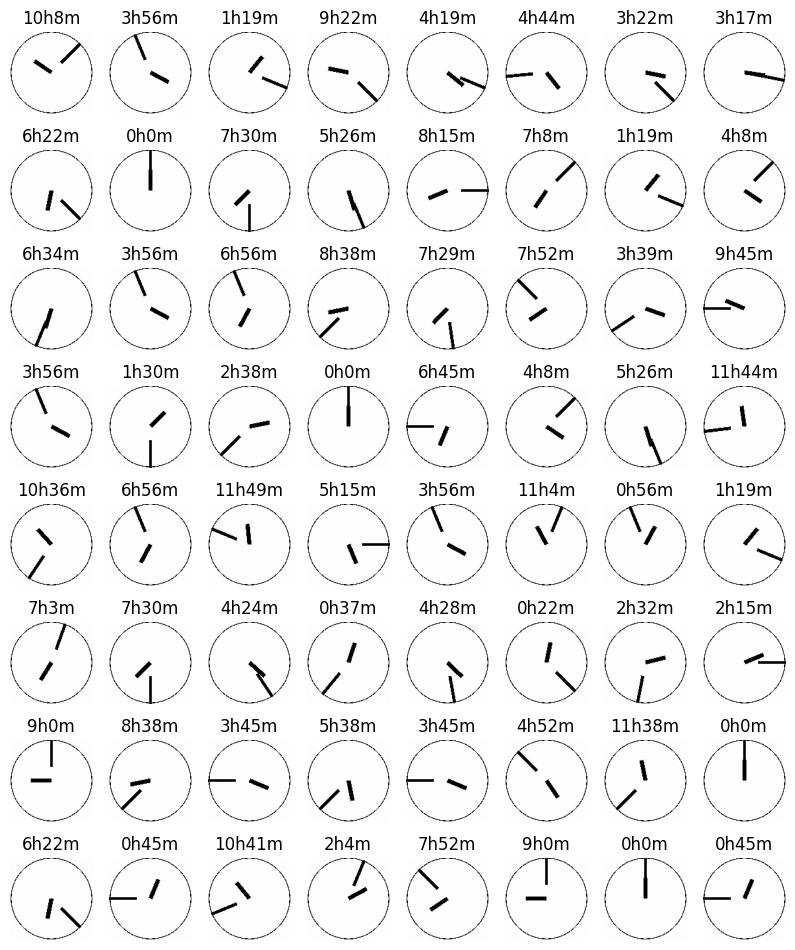

: 

In [47]:
for i in range(1):
  show_data(dataloader)

In [44]:
eval_model(type_, model, [i for i in val_dataloader], device=device, latent_dim=LATENT_DIM, criterion=nn.SmoothL1Loss())

tensor(1345739.8750)tensor(1599649.8750)tensor(646687.7500)   tensor(0.6180)tensor(0.6180)  tensor(0.6180)tensor(477590.2500)tensor(0.4142) tensor(0.4142)  tensor(0.4142)tensor(0.7500) tensor(0.8750) 

tensor(0.8750)0tensor(0.6180)0

 
0tensor(0.4142)
 tensor(0.2500)
0tensor(1443461.1250)tensor(1275360.2500)
  tensor(832371.6875)tensor(0.6180)tensor(0.6180)   tensor(0.6180)tensor(0.4142)tensor(0.4142)   tensor(381396.5000)tensor(0.4142)tensor(0.1250) tensor(0.2500) 
tensor(0.6180)
tensor(0.6875)0 0


tensor(0.4142)0 
tensor(0.5000)
tensor(482078.6562)tensor(761560.0625)0  tensor(582348.2500)
tensor(0.6180)tensor(0.6180)   tensor(0.6180)tensor(0.4142)tensor(948839.4375) tensor(0.4142)  tensor(0.4142) tensor(0.0625) tensor(0.6180)tensor(0.6562)
 tensor(0.2500)
0
tensor(0.4142)0
 0

tensor(0.4375)
0tensor(1439896.5000)tensor(1096284.3750)
 tensor(1571402.2500) tensor(0.6180) tensor(0.6180) tensor(0.6180) tensor(1242811.8750)tensor(0.4142) tensor(0.4142)   tensor(0.4142)tensor(0.6180)tenso

RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x512 and 2048x1024)

# Encoders

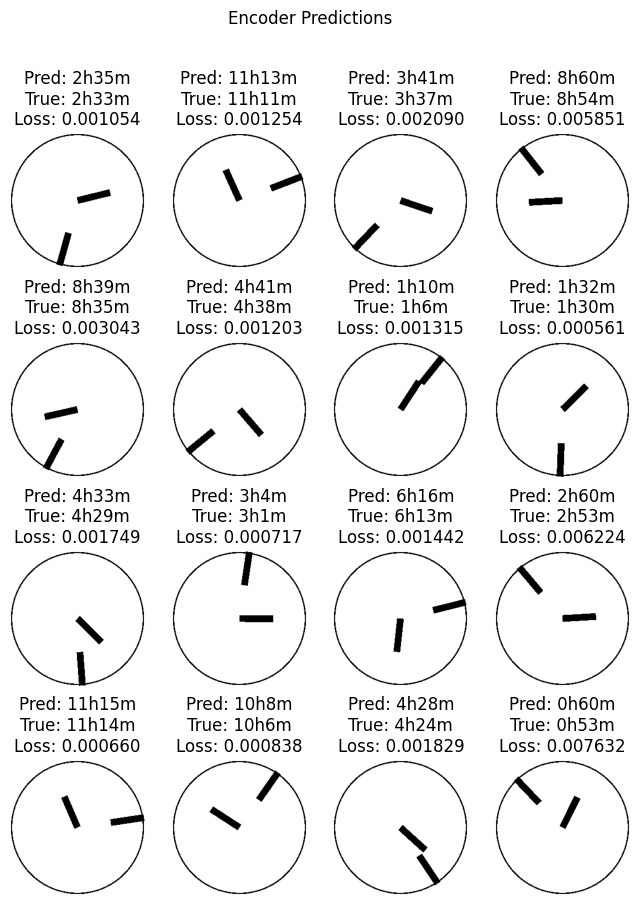

: 

In [27]:
visualize_predictions(type_, model, dataloader, latent_dim=LATENT_DIM)

plotting


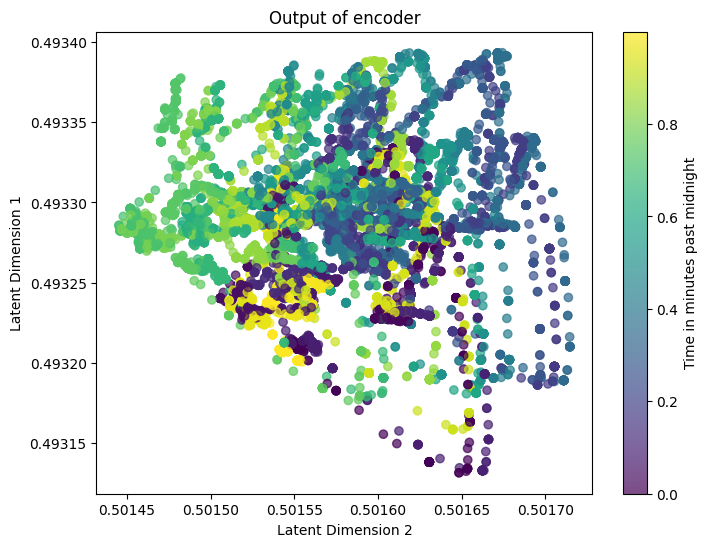

plotting


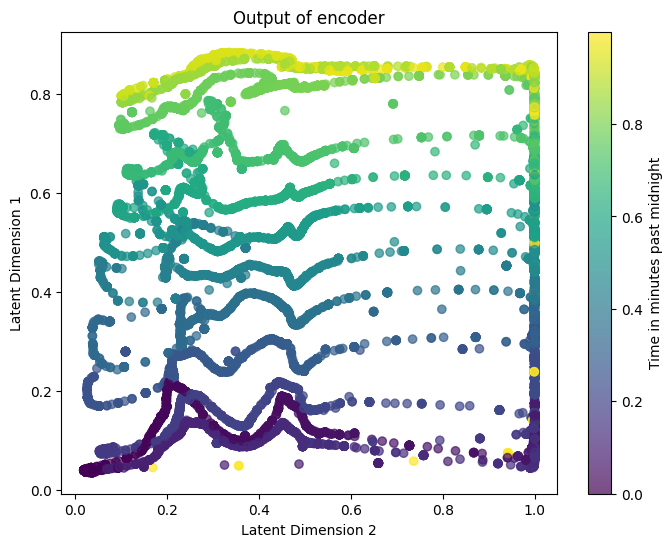

plotting


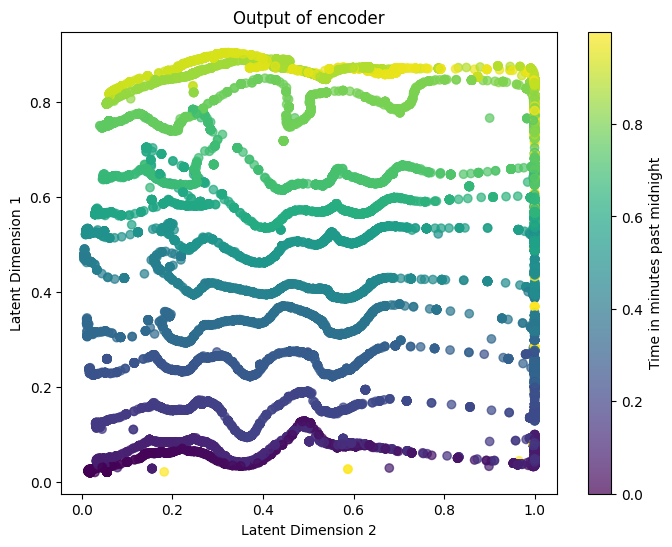

plotting


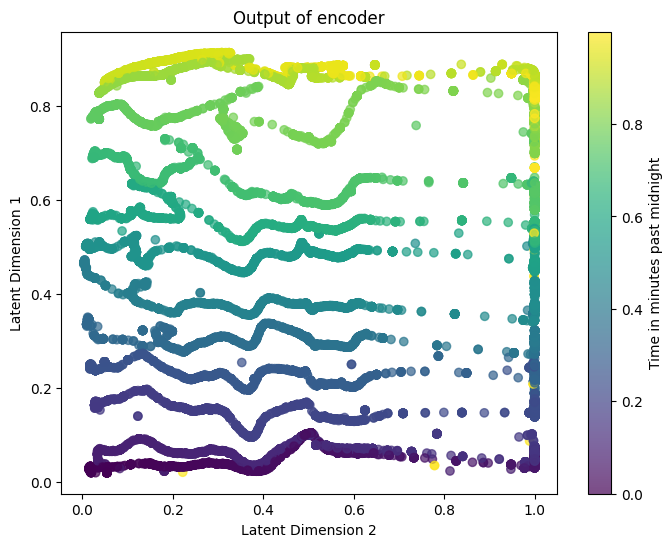

FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/ConvMLPEncoder/2-i256-d22/4.pt'

: 

In [2]:
for i in range(16):
  model = load_model_checkpoint(checkpoint=i)
  visualize_latent(type_, model, latent_dim=LATENT_DIM, dataloader=dataloader)


# Decoders

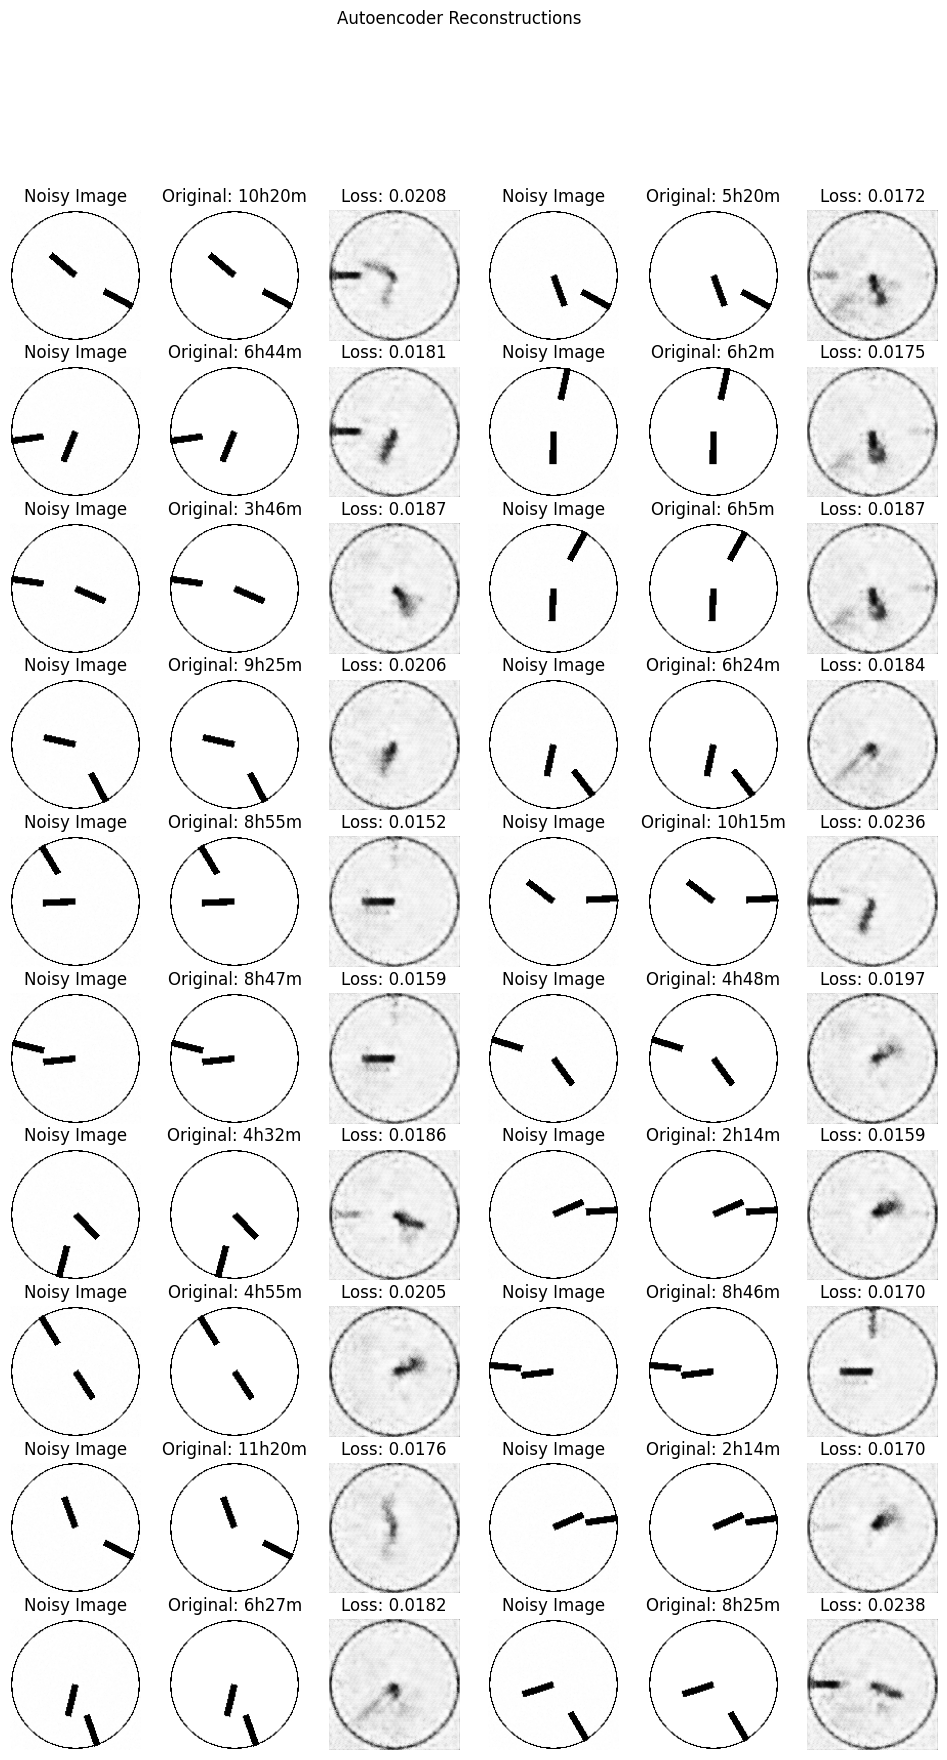

: 

In [6]:
visualize_reconstruction(type_, model, dataloader, latent_dim=LATENT_DIM)

# Autoencoders

  0%|          | 0/16 [00:01<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (128x1024 and 256x512)

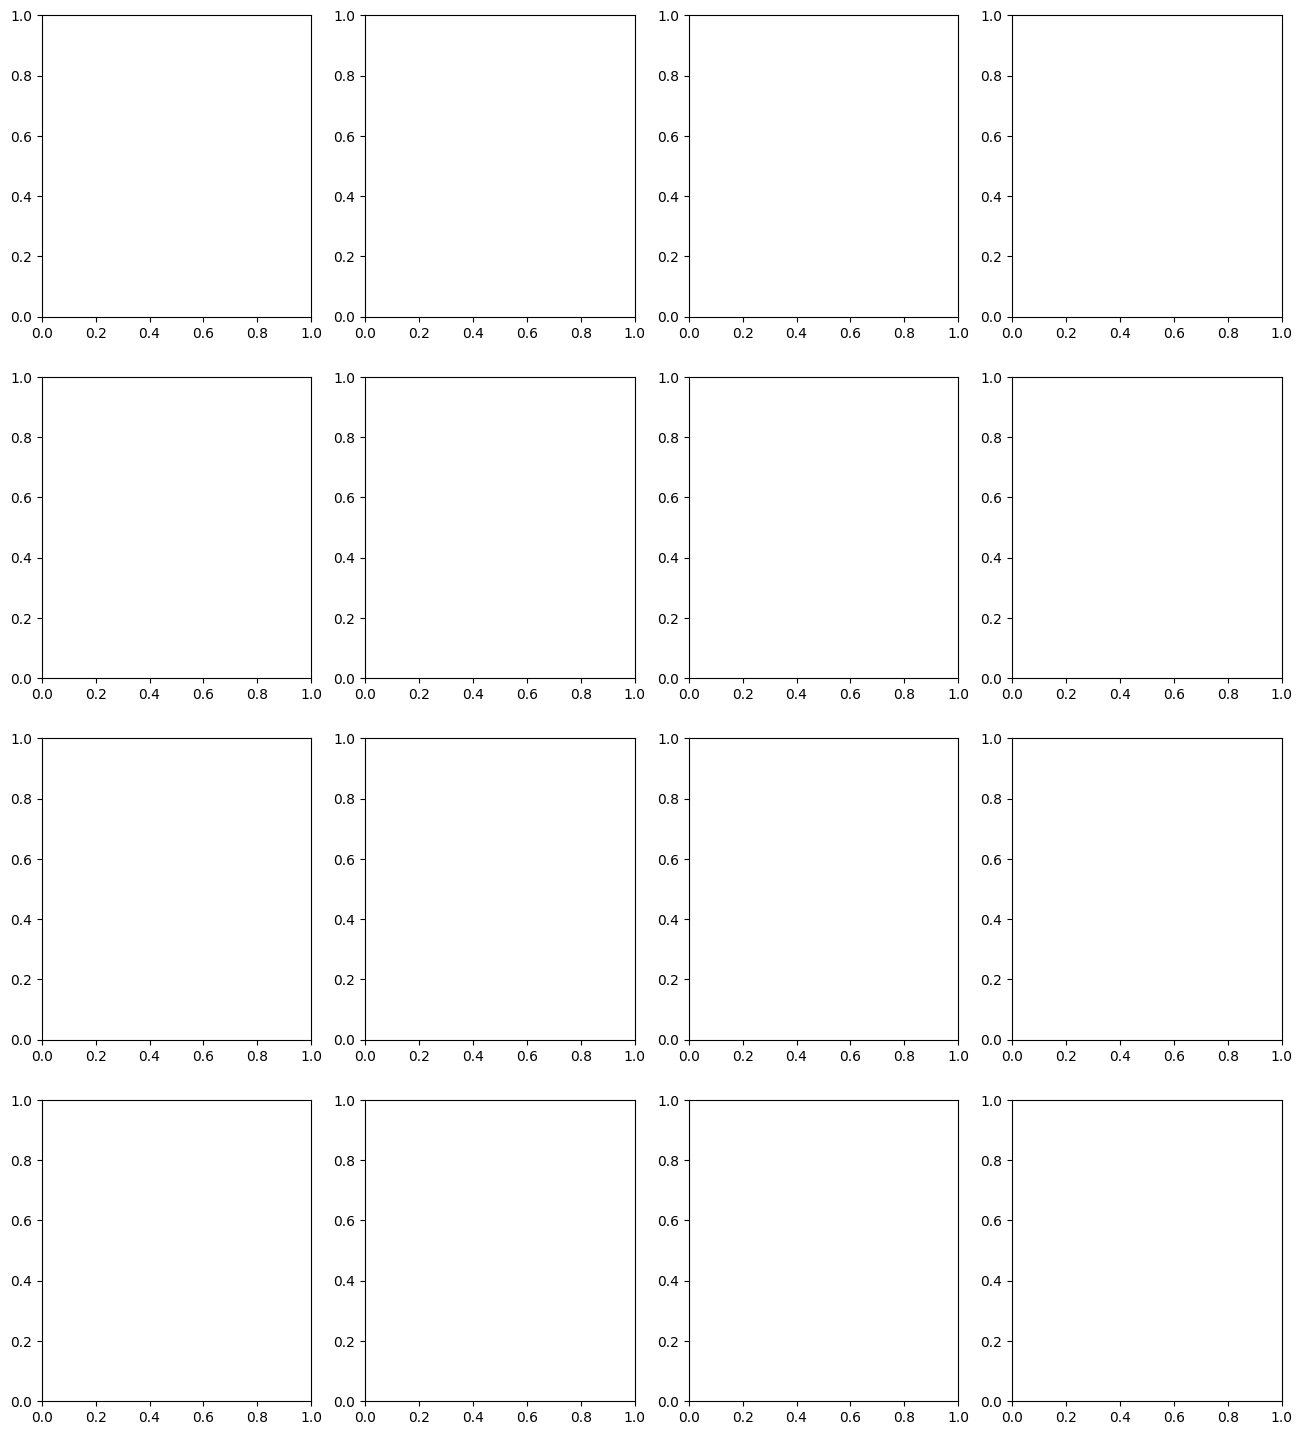

In [ ]:
import json
from autoencoder.vis import load_model_state_dict, get_outputs
from autoencoder.clock import get_dataloaders
from datasets.clock import ClockConfig, ClockDatasetConfig
from models.autoencoders import MLPResnetAutoencoder
import matplotlib.pyplot as plt
import torch
import numpy as n
from tqdm import tqdm
from sklearn.decomposition import PCA


IMG_SIZE=128
BATCH_SIZE=128

dataloader, val_dataloader, _, _ = get_dataloaders(
  data_config=ClockConfig(),
  dataset_config=ClockDatasetConfig(
    data_size=2**12,
    img_size=IMG_SIZE,
  ),
  # val_size=0,
  batch_size=BATCH_SIZE,
)


fig, ax = plt.subplots(4, 4, figsize=(16, 18))

for i in tqdm(range(16)):
  model = load_model_checkpoint(checkpoint=i)
  
  latents = []
  labels1d = []
  for _, _, label1d, _, latent, _ in get_outputs(type_, model, dataloader):
    latents.append(latent.unsqueeze(0).cpu())
    labels1d.append(label1d.unsqueeze(0).cpu())
    
  latents = torch.cat(latents, dim=0)
  labels1d = torch.cat(labels1d, dim=0)
  
  if LATENT_DIM > 2:
    pca = PCA(n_components=2)
    latents = pca.fit_transform(latents)
  
  ax[i//4, i%4].scatter(latents[:, 0], latents[:, 1], c=labels1d, cmap="viridis", s=3)
  ax[i//4, i%4].set_title(f"Checkpoint {i}")
  
plt.suptitle("Latent Space Visualization at Different Checkpoints")
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()
